# Machine Learning For NLP : Prediction of Sex

## Table des matières

## 0. Imports et Packages

In [1]:
import numpy as np
import pandas as pd
import re
from preprocessing import cleaning_pipeline, concatenate_column_names
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("transcriptions_with_sex.csv")
name_data = pd.read_csv("firstname_with_sex.csv", sep=";")

## 1. Nettoyage des données

In [3]:
column_to_extract = "groundtruth"
columns_to_drop = ["subject_line", "prediction"]
cleaned_df = cleaning_pipeline(df, name_data, column_to_extract, columns_to_drop)

In [4]:
cleaned_df

,sex,age,surname,lob,link,birth_date,employer,occupation,firstname,civil_status,observation,male,female
0,femme,30.0,Chardon,NaN,fille,NaN,NaN,idem,marie,NaN,NaN,10145.0,2390322.0
1,homme,67.0,Lhopital,NaN,chef,NaN,NaN,sp,louis,NaN,NaN,750498.0,2720.0
2,femme,15.0,Papin,NaN,idem,NaN,idem,idem,marie,NaN,NaN,10145.0,2390322.0
3,femme,NaN,Lavocat,Rigny,femme,1875.0,NaN,NaN,marie,NaN,NaN,10145.0,2390322.0
4,femme,78.0,Benne,NaN,NaN,NaN,NaN,NaN,marguerite,NaN,NaN,1441.0,813859.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,femme,61.0,Burlurut,NaN,épouse,NaN,NaN,sans,pétronille,NaN,NaN,30.0,13067.0
237,homme,39.0,Combey,NaN,son,NaN,NaN,idem,alexandre,NaN,NaN,90238.0,413.0
238,femme,38.0,Collin,NaN,épouse,NaN,idem,idem,marguerite,NaN,NaN,1441.0,813859.0
239,homme,NaN,Dumont,idem,fils,1900.0,NaN,NaN,etienne,NaN,NaN,211297.0,898.0


In [5]:
# Compter le nombre de NaN par colonne
na_counts = cleaned_df.isna().sum()

# Afficher le nombre de NaN par colonne
print(na_counts)

sex               0
age              43
surname           1
lob             206
link             11
birth_date      194
employer        192
occupation       42
firstname         1
civil_status    238
observation     240
male              3
female            3
dtype: int64


In [6]:
cleaned_df.drop('observation', axis=1, inplace=True)

In [7]:
cleaned_df

,sex,age,surname,lob,link,birth_date,employer,occupation,firstname,civil_status,male,female
0,femme,30.0,Chardon,NaN,fille,NaN,NaN,idem,marie,NaN,10145.0,2390322.0
1,homme,67.0,Lhopital,NaN,chef,NaN,NaN,sp,louis,NaN,750498.0,2720.0
2,femme,15.0,Papin,NaN,idem,NaN,idem,idem,marie,NaN,10145.0,2390322.0
3,femme,NaN,Lavocat,Rigny,femme,1875.0,NaN,NaN,marie,NaN,10145.0,2390322.0
4,femme,78.0,Benne,NaN,NaN,NaN,NaN,NaN,marguerite,NaN,1441.0,813859.0
...,...,...,...,...,...,...,...,...,...,...,...,...
236,femme,61.0,Burlurut,NaN,épouse,NaN,NaN,sans,pétronille,NaN,30.0,13067.0
237,homme,39.0,Combey,NaN,son,NaN,NaN,idem,alexandre,NaN,90238.0,413.0
238,femme,38.0,Collin,NaN,épouse,NaN,idem,idem,marguerite,NaN,1441.0,813859.0
239,homme,NaN,Dumont,idem,fils,1900.0,NaN,NaN,etienne,NaN,211297.0,898.0


In [8]:
# Séparation des features (X) et de la cible (y)
X = cleaned_df.drop("sex", axis=1)  # Features (toutes les colonnes sauf 'sex')
y = cleaned_df["sex"]  # Cible (colonne 'sex')

# Split train/test avec stratification sur la colonne 'sex'
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 2. Statistiques descriptives

### 2.1 Wordcloud sur la fréquence des genres des prénoms

In [9]:
name_data["female_freq"] = name_data["female"] / (name_data["male"] + name_data["female"])

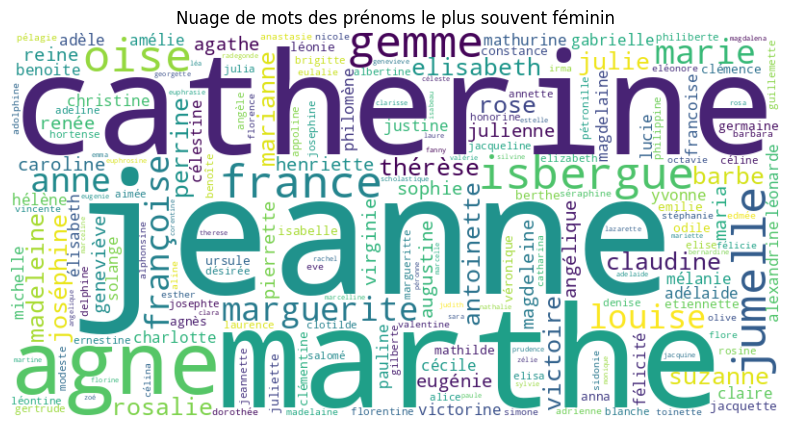

In [10]:
most_female_name = name_data[name_data["female_freq"] >= 0.5]
all_names = " ".join(most_female_name["firstname"].dropna())
wordcloud = WordCloud(
    width=800, height=400, background_color="white"
).generate(all_names)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") 
plt.title("Nuage de mots des prénoms le plus souvent féminin")
plt.show()

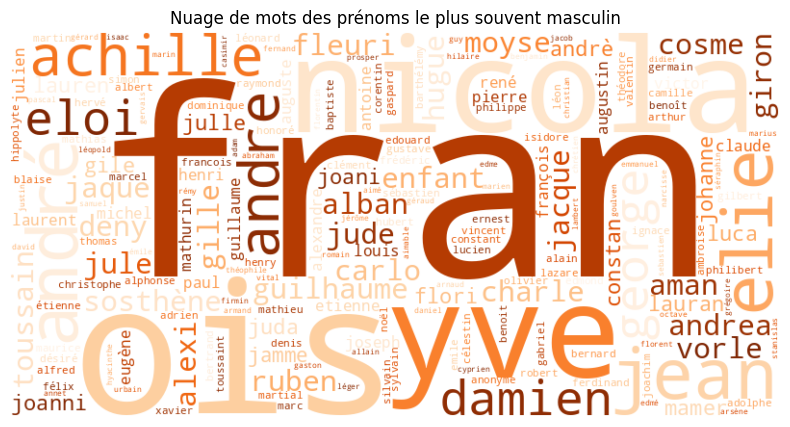

In [11]:
most_male_name = name_data[name_data["female_freq"] < 0.5]
all_names = " ".join(most_male_name["firstname"].dropna())
colormap = "Oranges"
wordcloud = WordCloud(
    width=800, height=400, background_color="white", colormap=colormap
).generate(all_names)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuage de mots des prénoms le plus souvent masculin")
plt.show()

### 2.2 Statistiques descriptives sur le données d'entraînements

In [12]:
df_train = X_train.copy()
df_train['target'] = y_train

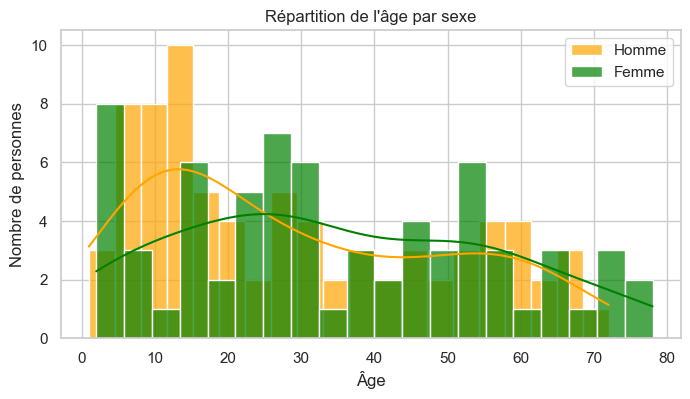

In [37]:
# Définir les paramètres esthétiques seaborn
sns.set(style="whitegrid")

# Tracer le graphique avec seaborn
plt.figure(figsize=(8, 4))

# KDE plot pour les hommes
sns.histplot(df_homme['age'], bins=20, color='orange', alpha=0.7, kde=True, label='Homme')

# KDE plot pour les femmes
sns.histplot(df_femme['age'], bins=20, color='green', alpha=0.7, kde=True, label='Femme')

# Personnalisation du graphique
plt.title("Répartition de l'âge par sexe")
plt.xlabel("Âge")
plt.ylabel("Nombre de personnes")
plt.legend()

# Afficher le graphique
plt.show()

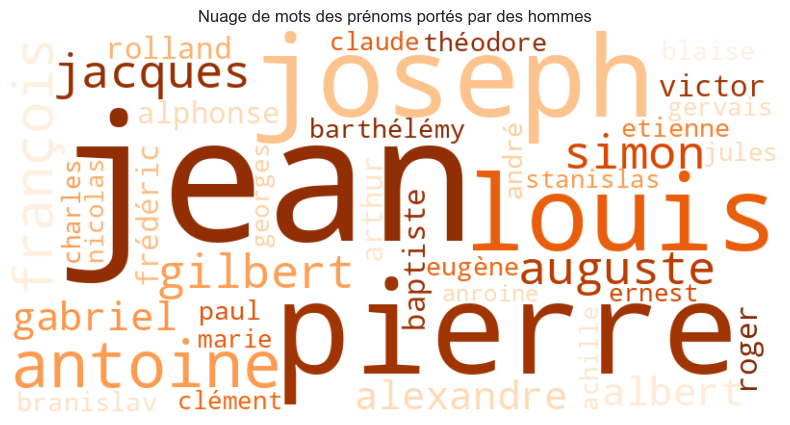

In [44]:
all_names = " ".join(df_homme["firstname"].dropna())
colormap = "Oranges"
wordcloud = WordCloud(
    width=800, height=400, background_color="white", colormap=colormap
).generate(all_names)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuage de mots des prénoms portés par des hommes")
plt.show()

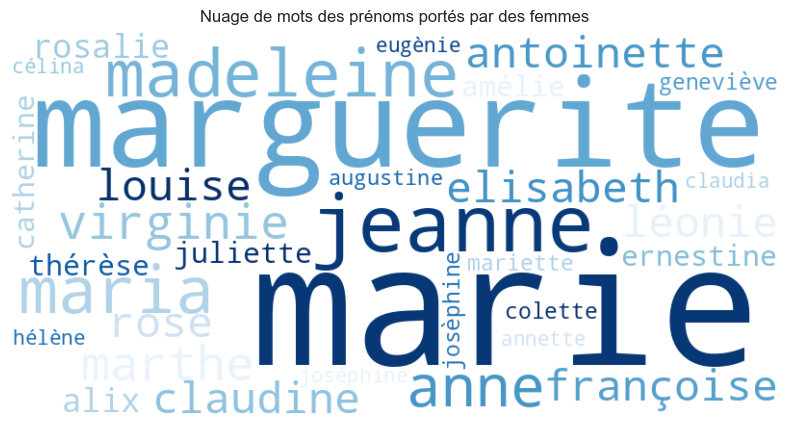

In [43]:
all_names = " ".join(df_femme["firstname"].dropna())
colormap = "Blues"
wordcloud = WordCloud(
    width=800, height=400, background_color="white", colormap=colormap
).generate(all_names)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuage de mots des prénoms portés par des femmes")
plt.show()

## 3. Preprocessing 

In [16]:
X_train['texte'] = X_train.apply(concatenate_column_names, axis=1)
X_test["texte"] = X_test.apply(concatenate_column_names, axis=1)

/Users/emanieluu/Documents/ENSAE/3A/S2/NLP/nlp_project/ml_for_nlp/preprocessing.py:37: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, value in row.iteritems():
/Users/emanieluu/Documents/ENSAE/3A/S2/NLP/nlp_project/ml_for_nlp/preprocessing.py:37: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, value in row.iteritems():


## 4. Modélisation

In [17]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset

In [18]:
# Division des données en ensembles d'entraînement et de validation
train_texts = X_train['texte'].tolist()
val_texts = X_test['texte'].tolist()
train_targets = y_train.apply(lambda x: 1 if x == "homme" else 0).tolist()
val_targets = y_test.apply(lambda x: 1 if x == "homme" else 0).tolist()

In [45]:
train_texts

['age_21.0 surname_Roy link_idem occupation_idem firstname_joseph male_897742.0 female_4246.0',
 'age_19.0 surname_Dey occupation_domestique firstname_marie male_10145.0 female_2390322.0',
 'age_17.0 surname_Rouchon link_idem employer_idem occupation_idem firstname_victor male_87061.0 female_314.0',
 'age_9.0 surname_Débousset link_fille occupation_idem firstname_marthe male_95.0 female_35815.0',
 'age_64.0 surname_Chapelier link_père occupation_jardinier firstname_jean male_1869615.0 female_6476.0',
 'surname_Aumaitre lob_Saint link_ép birth_date_1852.0 firstname_virginie male_80.0 female_48268.0',
 'age_49.0 surname_Mathion link_chef occupation_journalier firstname_pierre male_1475841.0 female_5047.0',
 'age_55.0 surname_Triboulet link_chef occupation_forgeron firstname_jean male_1869615.0 female_6476.0',
 'surname_Mayeur lob_Paris link_idem birth_date_1896.0 employer_idem occupation_idem firstname_marguerite male_1441.0 female_813859.0',
 'age_78.0 surname_Benne firstname_marguerite

### 4.1 Modèle : Bert Base Uncased

In [19]:
# Initialisation du tokenizer et du modèle BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # 2 labels: male, female

# Tokenisation des données
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)

# Création des datasets PyTorch
train_dataset = TensorDataset(
    torch.tensor(train_encodings['input_ids']),
    torch.tensor(train_encodings['attention_mask']),
    torch.tensor(train_targets)
)
val_dataset = TensorDataset(
    torch.tensor(val_encodings['input_ids']),
    torch.tensor(val_encodings['attention_mask']),
    torch.tensor(val_targets)
)

# Paramètres d'entraînement
batch_size = 16
num_epochs = 3
learning_rate = 2e-5

# Création des dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Configuration de l'optimiseur
optimizer = AdamW(model.parameters(), lr=learning_rate)

# Entraînement du modèle
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids, attention_mask, labels = tuple(t.to(device) for t in batch)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_train_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}: Average training loss = {avg_train_loss:.4f}")

# Évaluation du modèle sur l'ensemble de validation
model.eval()
val_preds = []
val_true = []

with torch.no_grad():
    for batch in val_loader:
        input_ids, attention_mask, labels = tuple(t.to(device) for t in batch)
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        val_preds.extend(preds)
        val_true.extend(labels.cpu().numpy())

val_accuracy = accuracy_score(val_true, val_preds)
print(f"Validation accuracy: {val_accuracy:.4f}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/emanieluu/Library/Python/3.9/lib/python/site-packages/transformers/optimization.py:457: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Average training loss = 0.6348
Epoch 2: Average training loss = 0.2997
Epoch 3: Average training loss = 0.1087
Validation accuracy: 0.9388


### 4.2 Modèle : Camembert base

In [20]:
from transformers import CamembertTokenizer, CamembertForSequenceClassification, AdamW

In [21]:
# Initialisation du tokenizer et du modèle CamemBERT
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')
model = CamembertForSequenceClassification.from_pretrained('camembert-base', num_labels=2)  # 2 labels: 0 (female), 1 (male)

# Tokenisation des données
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)

# Création des datasets PyTorch
train_dataset = TensorDataset(
    torch.tensor(train_encodings['input_ids']),
    torch.tensor(train_encodings['attention_mask']),
    torch.tensor(train_targets)
)
val_dataset = TensorDataset(
    torch.tensor(val_encodings['input_ids']),
    torch.tensor(val_encodings['attention_mask']),
    torch.tensor(val_targets)
)

# Paramètres d'entraînement
batch_size = 16
num_epochs = 3
learning_rate = 2e-5

# Création des dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Configuration de l'optimiseur
optimizer = AdamW(model.parameters(), lr=learning_rate)

# Entraînement du modèle
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids, attention_mask, labels = tuple(t.to(device) for t in batch)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_train_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}: Average training loss = {avg_train_loss:.4f}")

# Évaluation du modèle sur l'ensemble de validation
model.eval()
val_preds = []
val_true = []

with torch.no_grad():
    for batch in val_loader:
        input_ids, attention_mask, labels = tuple(t.to(device) for t in batch)
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        val_preds.extend(preds)
        val_true.extend(labels.cpu().numpy())

val_accuracy = accuracy_score(val_true, val_preds)
print(f"Validation accuracy: {val_accuracy:.4f}")

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/508 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/emanieluu/Library/Python/3.9/lib/python/site-packages/transformers/optimization.py:457: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Average training loss = 0.6987
Epoch 2: Average training loss = 0.6843
Epoch 3: Average training loss = 0.6486
Validation accuracy: 0.9184
